<a href="https://colab.research.google.com/github/nehanagle/Flight-Price-Prediction/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predict The Flight Ticket Price Hackathon**


Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the **ticket**

In [4]:
# importing the necessary package and creating the test and train data sets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold



In [5]:
#importing Train and test data
training_set = pd.read_excel("/content/Data_Train.xlsx")
test_set = pd.read_excel("/content/Test_set.xlsx")

In [6]:
training_set.head() # seeing how the training data looks

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
# priniting the details about the datasets

print("\nEDA on Training Set\n")
print("#"*30)

print("\nFeatures/Columns : \n", training_set.columns)
print("\n\nNumber of Features/Columns : ", len(training_set.columns))
print("\nNumber of Rows : ",len(training_set))
print("\n\nData Types :\n", training_set.dtypes)

print("\n Contains NaN/Empty cells : ", training_set.isnull().values.any())

print("\n Total empty cells by column :\n", training_set.isnull().sum(), "\n\n")


# Test Set
print("#"*30)
print("\nEDA on Test Set\n")
print("#"*30)


print("\nFeatures/Columns : \n",test_set.columns)
print("\n\nNumber of Features/Columns : ",len(test_set.columns))
print("\nNumber of Rows : ",len(test_set))
print("\n\nData Types :\n", test_set.dtypes)
print("\n Contains NaN/Empty cells : ", test_set.isnull().values.any())
print("\n Total empty cells by column :\n", test_set.isnull().sum())


EDA on Training Set

##############################

Features/Columns : 
 Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


Number of Features/Columns :  11

Number of Rows :  10683


Data Types :
 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

 Contains NaN/Empty cells :  True

 Total empty cells by column :
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64 


##############################

EDA on Test

In [8]:

print("Original Length of Training Set : ", len(training_set))

training_set = training_set.dropna() # dropping the NaN value.  we chose to drop it as there is only one NaN value. 

print("Length of Training Set after dropping NaN: ", len(training_set))

Original Length of Training Set :  10683
Length of Training Set after dropping NaN:  10682


This means that there was only one row having missing values which we have removed

### converting the data type to data-time format and adding new columns

In [9]:
training_set['Journey_Day'] = pd.to_datetime(training_set.Date_of_Journey, format='%d/%m/%Y').dt.day
training_set.head() # cheking the dataset after transformation

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [10]:
training_set['Journey_Month'] = pd.to_datetime(training_set.Date_of_Journey, format='%d/%m/%Y').dt.month
training_set['Journey_Year'] = pd.to_datetime(training_set.Date_of_Journey, format='%d/%m/%Y').dt.year
training_set.head() # cheking the dataset after transformation

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [11]:
# Test Set
test_set['Journey_Day'] = pd.to_datetime(test_set.Date_of_Journey, format='%d/%m/%Y').dt.day
test_set['Journey_Month'] = pd.to_datetime(test_set.Date_of_Journey, format='%d/%m/%Y').dt.month
test_set.head() # cheking the test dataset after transformation

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [12]:
# Compare the dates and delete the original date feature

training_set.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
print('training set after transformation')
display(training_set.head())
        


training set after transformation


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [13]:
test_set.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
print('test set after transformation')
display(test_set.head())

test set after transformation


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


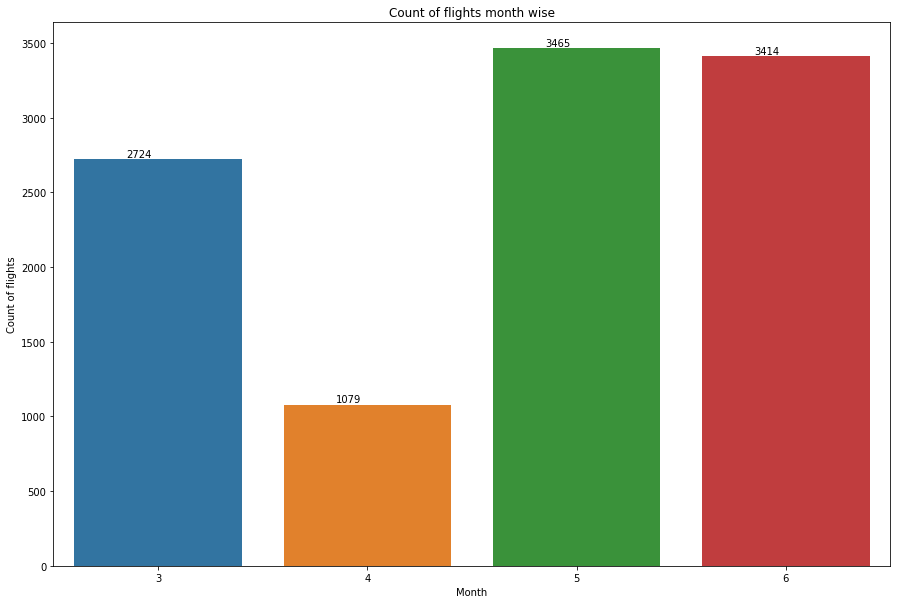

In [14]:
import seaborn as sns
plt.figure(figsize = (15, 10))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_Month', data = training_set)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

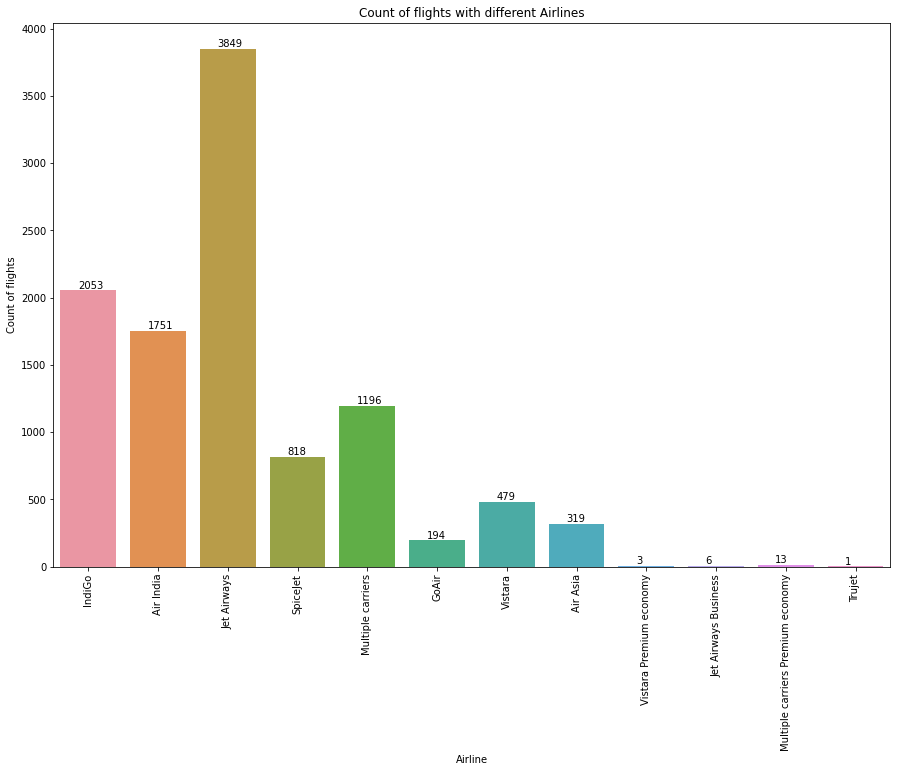

In [15]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =training_set)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

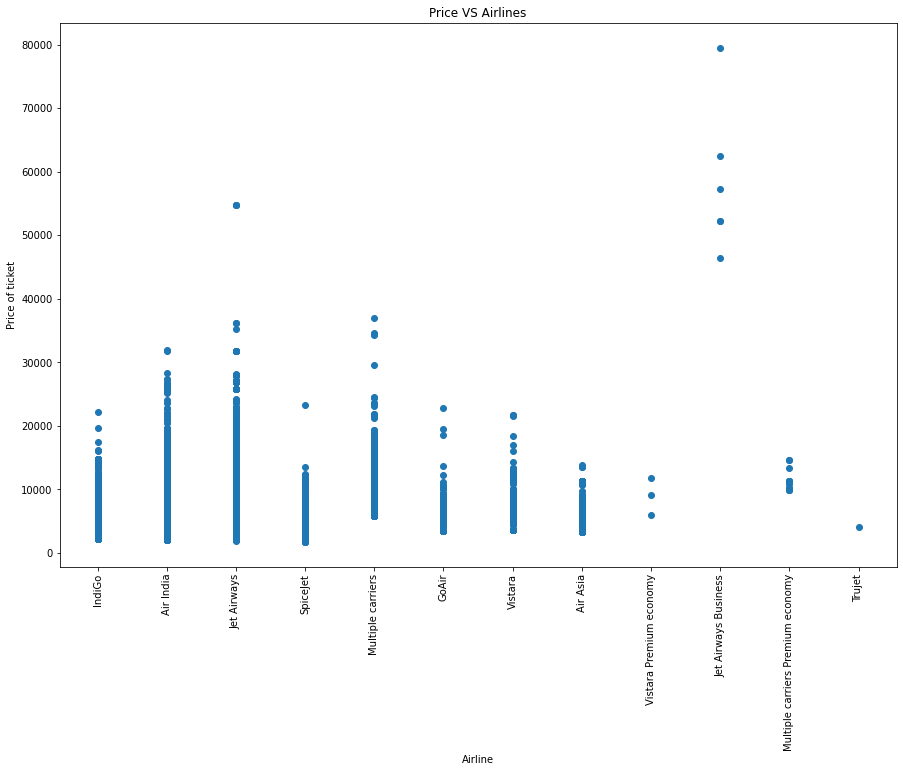

In [16]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(training_set['Airline'], training_set['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [17]:
training_set.info() # checking the data types of all the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Journey_Day      10682 non-null  int64 
 11  Journey_Month    10682 non-null  int64 
 12  Journey_Year     10682 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.5+ MB


In [18]:
#Our duration column had time written in this format 2h 50m . 
#To help machine learning algorithm derive useful insights, we will convert this text into numeric.


duration = list(training_set['Duration'])


for i in range(len(duration)) :
    if len(duration[i].split()) != 2: 
        
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'   
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1])) #for examole if duration is 49 mintutes 4 sec then it will reflect like 
    dur_minutes.append(int(duration[i].split()[1][:-1]))#0:49:4 and if 2 hours 10 seconds then it will reflect like 2:0:10
    
training_set['Duration_hours'] = dur_hours
training_set['Duration_minutes'] =dur_minutes




# Test Set(applyig same code to convert 'Duration' to 'Duration _Hours' and 'Duration_Minutes')
#2h 50m
durationT = list(test_set['Duration'])

for i in range(len(durationT)) :
    if len(durationT[i].split()[0]) != 2:       
        if 'h' in durationT[i] :
            durationT[i] = durationT[i].strip() + ' 0m'
        elif 'm' in durationT[i] :
            durationT[i] = '0h {}'.format(durationT[i].strip())
            
dur_hours = []
dur_minutes = []  

for i in range(len(durationT)) :
    #print(durationT[i].split())
    dur_hours.append(int(durationT[i].split()[0][:-1]))
    if(len(durationT[i].split())>1):
        dur_minutes.append(int(durationT[i].split()[1][:-1]))
    else:
        dur_minutes.append(int(0))
  
    
test_set['Duration_hours'] = dur_hours
test_set['Duration_minutes'] = dur_minutes



In [19]:
training_set.drop(labels = 'Duration', axis = 1, inplace = True) # dropping the original duration column from training set
test_set.drop(labels = 'Duration', axis = 1, inplace = True) #  dropping the original duration column from training set

training_set.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2019,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,2019,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,2019,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,2019,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,2019,4,45


In [20]:
training_set.info() # checking the data types of all the columns once again. 'Duration_hours' and 'Duration_minutes' are integer type columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Dep_Time          10682 non-null  object
 5   Arrival_Time      10682 non-null  object
 6   Total_Stops       10682 non-null  object
 7   Additional_Info   10682 non-null  object
 8   Price             10682 non-null  int64 
 9   Journey_Day       10682 non-null  int64 
 10  Journey_Month     10682 non-null  int64 
 11  Journey_Year      10682 non-null  int64 
 12  Duration_hours    10682 non-null  int64 
 13  Duration_minutes  10682 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.5+ MB


In [21]:
#Converting 'Dep_Time' to 'Depart_Time_hour' and 'Depart_time_Minutes'
training_set['Depart_Time_Hour'] = pd.to_datetime(training_set.Dep_Time).dt.hour
training_set['Depart_Time_Minutes'] = pd.to_datetime(training_set.Dep_Time).dt.minute

training_set.drop(labels = 'Dep_Time', axis = 1, inplace = True)

training_set.head() # cheking the training set after transformation

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,2019,2,50,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,2019,7,25,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,6,2019,19,0,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,12,5,2019,5,25,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,1,3,2019,4,45,16,50


In [22]:
#Converting 'Arr_Time' to 'Arr_Time_hour' and 'Arr_time_Minutes' and dropping the original column
training_set['Arr_Time_Hour'] = pd.to_datetime(training_set.Arrival_Time).dt.hour
training_set['Arr_Time_Minutes'] = pd.to_datetime(training_set.Arrival_Time).dt.minute

training_set.drop(labels = 'Arrival_Time', axis = 1, inplace = True)
training_set.head() # cheking the training set after transformation

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,4,45,16,50,21,35


In [23]:
# applying the same to test set
test_set['Depart_Time_Hour'] = pd.to_datetime(test_set.Dep_Time).dt.hour
test_set['Depart_Time_Minutes'] = pd.to_datetime(test_set.Dep_Time).dt.minute


test_set.drop(labels = 'Dep_Time', axis = 1, inplace = True)
test_set.head() # cheking the test set after transformation

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,1 stop,No info,6,6,10,55,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,1 stop,No info,12,5,4,0,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,1 stop,In-flight meal not included,21,5,23,45,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,1 stop,No info,21,5,13,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,non-stop,No info,24,6,2,50,23,55


In [24]:
test_set['Arr_Time_Hour'] = pd.to_datetime(test_set.Arrival_Time).dt.hour
test_set['Arr_Time_Minutes'] = pd.to_datetime(test_set.Arrival_Time).dt.minute

test_set.drop(labels = 'Arrival_Time', axis = 1, inplace = True)
test_set.head() # cheking the test set after transformation

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,23,55,2,45


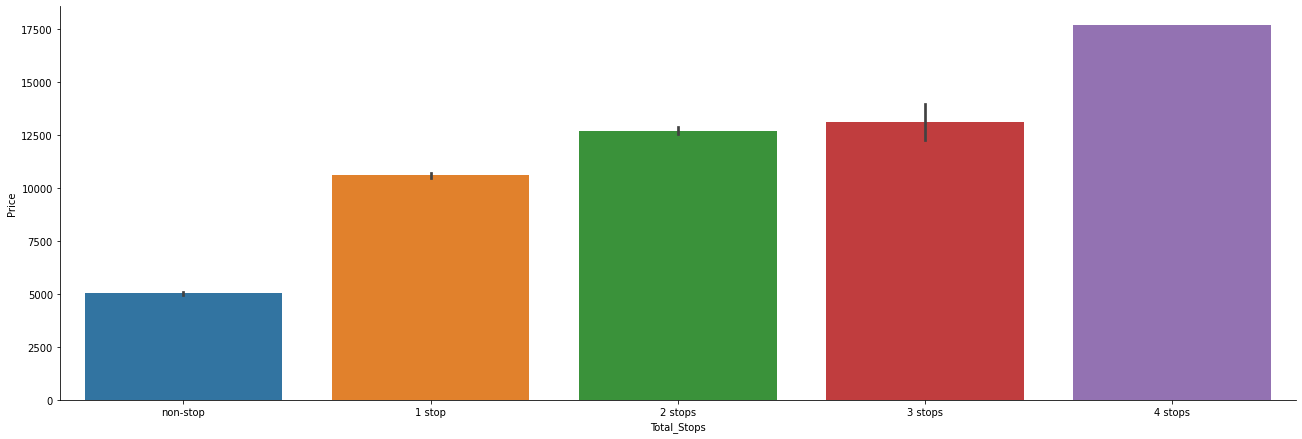

In [25]:
sns.catplot(x = 'Total_Stops', y = 'Price',data=training_set.sort_values('Price',ascending=True), kind='bar', height=6, aspect=3)

**From the above chart we can clearly see that when the number of stop increases the ticket price also increases**

So we have to encode it as a ordinal encoding technique

In [26]:
training_set['Total_Stops'] = training_set['Total_Stops'].replace('non-stop','0 stop')
training_set['stops'] = (training_set['Total_Stops'].str.split(' ').str[0]).astype(int)
training_set.drop(labels = 'Total_Stops', axis = 1, inplace = True)

In [27]:
training_set.head(5)

,Airline,Source,Destination,Route,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,24,3,2019,2,50,22,20,1,10,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,2019,7,25,5,50,13,15,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,2019,19,0,9,25,4,25,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,12,5,2019,5,25,18,5,23,30,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,3,2019,4,45,16,50,21,35,1


In [28]:
training_set['Additional_Info'] = training_set['Additional_Info'].replace('No info','No Info')
training_set['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [29]:
training_set['Route_1']=training_set['Route'].str.split('→ ').str[0]
training_set['Route_2']=training_set['Route'].str.split('→ ').str[1]
training_set['Route_3']=training_set['Route'].str.split('→ ').str[2]
training_set['Route_4']=training_set['Route'].str.split('→ ').str[3]
training_set['Route_5']=training_set['Route'].str.split('→ ').str[4]

In [30]:
training_set['Route_1'].fillna("None",inplace=True)
training_set['Route_2'].fillna("None",inplace=True)
training_set['Route_3'].fillna("None",inplace=True)
training_set['Route_4'].fillna("None",inplace=True)
training_set['Route_5'].fillna("None",inplace=True)

In [31]:
training_set=training_set.drop(['Route'],axis=1)

In [32]:
training_set.head()

,Airline,Source,Destination,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No Info,3897,24,3,2019,2,50,22,20,1,10,0,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No Info,7662,1,5,2019,7,25,5,50,13,15,2,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No Info,13882,9,6,2019,19,0,9,25,4,25,2,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No Info,6218,12,5,2019,5,25,18,5,23,30,1,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No Info,13302,1,3,2019,4,45,16,50,21,35,1,BLR,NAG,DEL,None,None


In [33]:
# From the info above it could be observed that many colmns are of object type. So, converting those categorical columns to numerical columns
training_set['Additional_Info'] = training_set['Additional_Info'].replace('No info','No Info')
training_set['Additional_Info'].unique()


array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [34]:
training_set['Additional_Info'] = training_set['Additional_Info'].map({
    'No Info':0, 
    'In-flight meal not included':1,
    'No check-in baggage included':1,
    '1 Short layover':3,
    '1 Long layover':4,
    'Change airports':5,
    'Business class':6,
    'Red-eye flight':7,
    '2 Long layover':8
})

In [35]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
training_set["Airline"]=encoder.fit_transform(training_set['Airline'])
training_set["Source"]=encoder.fit_transform(training_set['Source'])
training_set["Destination"]=encoder.fit_transform(training_set['Destination'])
training_set["Route_1"]=encoder.fit_transform(training_set['Route_1'])
training_set["Route_2"]=encoder.fit_transform(training_set['Route_2'])
training_set["Route_3"]=encoder.fit_transform(training_set['Route_3'])
training_set["Route_4"]=encoder.fit_transform(training_set['Route_4'])
training_set["Route_5"]=encoder.fit_transform(training_set['Route_5'])


In [36]:
training_set.head()

,Airline,Source,Destination,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,3897,24,3,2019,2,50,22,20,1,10,0,0,13,24,12,4
1,1,3,0,0,7662,1,5,2019,7,25,5,50,13,15,2,2,25,1,3,4
2,4,2,1,0,13882,9,6,2019,19,0,9,25,4,25,2,3,32,4,5,4
3,3,3,0,0,6218,12,5,2019,5,25,18,5,23,30,1,2,34,3,12,4
4,3,0,5,0,13302,1,3,2019,4,45,16,50,21,35,1,0,34,8,12,4


### Applying  similar operations on the Test Set

In [37]:
test_set['Additional_Info'] = test_set['Additional_Info'].replace('No info','No Info')
test_set['Route_1']=test_set['Route'].str.split('→ ').str[0]
test_set['Route_2']=test_set['Route'].str.split('→ ').str[1]
test_set['Route_3']=test_set['Route'].str.split('→ ').str[2]
test_set['Route_4']=test_set['Route'].str.split('→ ').str[3]
test_set['Route_5']=test_set['Route'].str.split('→ ').str[4]

test_set['Route_1'].fillna("None",inplace=True)
test_set['Route_2'].fillna("None",inplace=True)
test_set['Route_3'].fillna("None",inplace=True)
test_set['Route_4'].fillna("None",inplace=True)
test_set['Route_5'].fillna("None",inplace=True)

test_set['Additional_Info'] = test_set['Additional_Info'].map({
    'No Info':0, 
    'In-flight meal not included':1,
    'No check-in baggage included':1,
    '1 Short layover':3,
    '1 Long layover':4,
    'Change airports':5,
    'Business class':6,
    'Red-eye flight':7,
    '2 Long layover':8
})


test_set["Airline"]=encoder.fit_transform(test_set['Airline'])
test_set["Source"]=encoder.fit_transform(test_set['Source'])
test_set["Destination"]=encoder.fit_transform(test_set['Destination'])
test_set["Route_1"]=encoder.fit_transform(test_set['Route_1'])
test_set["Route_2"]=encoder.fit_transform(test_set['Route_2'])
test_set["Route_3"]=encoder.fit_transform(test_set['Route_3'])
test_set["Route_4"]=encoder.fit_transform(test_set['Route_4'])
test_set["Route_5"]=encoder.fit_transform(test_set['Route_5'])



In [38]:
test_set['Total_Stops'] = test_set['Total_Stops'].replace('non-stop','0 stop')
test_set['stops'] = (test_set['Total_Stops'].str.split(' ').str[0]).astype(int)
test_set.drop(labels = 'Total_Stops', axis = 1, inplace = True)
test_set.drop(labels = 'Route', axis = 1, inplace = True)
test_set.head(5)

,Airline,Source,Destination,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5,stops
0,4,2,1,0,6,6,10,55,17,30,4,25,3,7,5,8,3,1
1,3,3,0,0,12,5,4,0,6,20,10,20,2,29,3,8,3,1
2,4,2,1,1,21,5,23,45,19,15,19,0,3,7,5,8,3,1
3,6,2,1,0,21,5,13,0,8,0,21,0,3,7,5,8,3,1
4,0,0,2,0,24,6,2,50,23,55,2,45,0,13,21,8,3,0


### Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

- heatmap
- featureimportance
- SelectKBest

In [39]:
#Taking independent variable in one variable and dependent variable in another variable
X = training_set.drop('Price', axis=1)
y = training_set['Price']

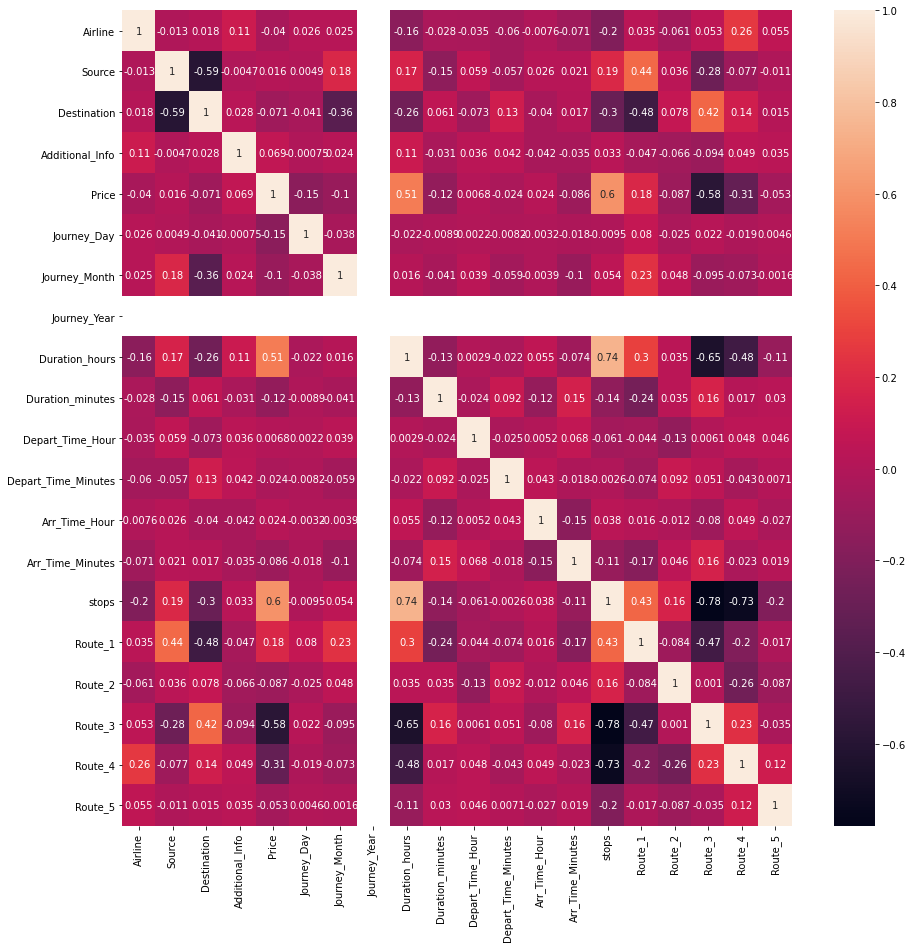

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(training_set.corr(), annot=True)

In [41]:
from sklearn.ensemble import ExtraTreesRegressor
m = ExtraTreesRegressor()
m.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [42]:
print(m.feature_importances_)

[0.1192318  0.00909532 0.01888302 0.07086972 0.12581847 0.04763308
 0.         0.09470027 0.01488848 0.01775317 0.01831287 0.02239698
 0.01491375 0.13435886 0.01510152 0.05343406 0.19763861 0.02462152
 0.00034849]


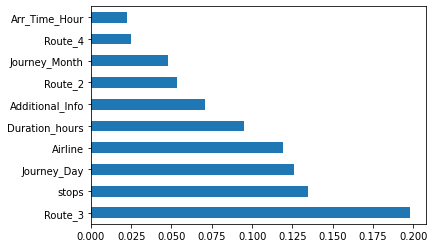

In [43]:
#plot graph of feature importances for better visualization

feat_importances = pd.Series(m.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [44]:
# training testing and splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (8545, 19)
The size of training output is (8545,)
**************************************************
The size of testing input is (2137, 19)
The size of testing output is (2137,)


In [46]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

m1=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [47]:
m1.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [48]:

m1.fit(X_train,y_train)


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [49]:
m1.get_support() # give false for unimportant feature

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [50]:

selected_features=X_train.columns[(m1.get_support())]
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Journey_Day',
       'Journey_Month', 'Duration_hours', 'Duration_minutes',
       'Depart_Time_Hour', 'Depart_Time_Minutes', 'Arr_Time_Hour',
       'Arr_Time_Minutes', 'stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [51]:
X_train.columns

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Duration_hours', 'Duration_minutes',
       'Depart_Time_Hour', 'Depart_Time_Minutes', 'Arr_Time_Hour',
       'Arr_Time_Minutes', 'stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [52]:
X_train=X_train.drop(['Journey_Year'],axis=1)
X_test=X_test.drop(['Journey_Year'],axis=1)

### **Building Machine Learning Model**

In [53]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, HuberRegressor, LogisticRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
models = [['LinearRegression : ', LinearRegression()],
          ['ElasticNet :', ElasticNet()],
          ['Lasso : ', Lasso()],
          ['Ridge : ', Ridge()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['SVR : ', SVR()],
          ['AdaBoostRegressor : ', AdaBoostRegressor()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()],
          ['ExtraTreeRegressor : ', ExtraTreeRegressor()],
          ['HuberRegressor : ', HuberRegressor()],
          ['XGBRegressor : ', XGBRegressor()],
          ['BayesianRidge : ', BayesianRidge()]]

In [55]:
import numpy as np
for name, model in models:
    model=model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

LinearRegression :  3280.196233678279
ElasticNet : 3307.315531740973
Lasso :  3279.892547339233
Ridge :  3280.1156281436997
KNeighborsRegressor :  2776.169281123609
DecisionTreeRegressor :  2137.2912637848954
RandomForestRegressor :  1740.1794178295602
SVR :  4579.672762524349
AdaBoostRegressor :  3489.3016027905187
GradientBoostingRegressor :  1849.515985851293
ExtraTreeRegressor :  2214.8484382965944
HuberRegressor :  3422.2549231104877
[06:37:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


XGBRegressor :  1891.2246448624378
BayesianRidge :  3279.176759053952


### **Model Evaluation**

In [56]:
algorithms = {
    'XGBRegressor' : {
        'model' : XGBRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'gamma' : [0.1,0.2, 0.3, 0.4, 0.5],
            'min_child_weight' : [1, 3, 5, 7, 9],
            'colsample_bytree' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30]
        }
    },
    'RandomForestRegressor' : {
        'model' : RandomForestRegressor(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    },
    'GradientBoostingRegressor' : {
        'model' : GradientBoostingRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'criterion' : ['friedman_mse', 'mse']
        }
    }
}

In [57]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [58]:
score = []

for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 10, n_jobs=-1, verbose=3)
    rs.fit(X_train, y_train)
    score.append({
        'model': name,
        'score' : rs.best_score_,
        'params' : rs.best_params_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   49.6s finished


[06:38:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.0min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.3min finished


In [59]:
final = pd.DataFrame(score, columns=['model', 'score', 'params'])
final

,model,score,params
0,XGBRegressor,0.901555,"{'min_child_weight': 3, 'max_depth': 7, 'learn..."
1,RandomForestRegressor,0.891407,"{'n_estimators': 300, 'min_samples_split': 4, ..."
2,GradientBoostingRegressor,0.888645,"{'n_estimators': 1000, 'learning_rate': 0.2, '..."


In [60]:
final['params'][0]

{'colsample_bytree': 0.5,
 'gamma': 0.2,
 'learning_rate': 0.25,
 'max_depth': 7,
 'min_child_weight': 3}

In [61]:
# Gradient Boosting 

GB_regressor = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.25, criterion = 'friedman_mse')
GB_regressor.fit(X_train, y_train)
GB_prediction = GB_regressor.predict(X_test)


In [62]:
GB_regressor.score(X_train, y_train), GB_regressor.score(X_test, y_test)

(0.9451649523301581, 0.9087647750491232)

In [63]:
print('MAE:', mean_absolute_error(y_test, GB_prediction))
print('MSE:', mean_squared_error(y_test, GB_prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, GB_prediction)))


MAE: 824.8621337255529
MSE: 1967219.0591383758
RMSE: 1402.5758657336064


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


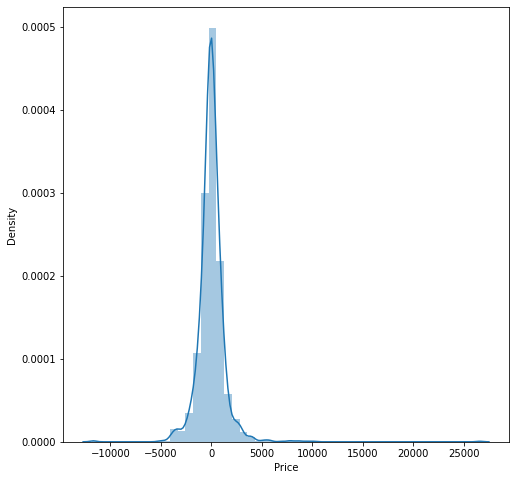

In [64]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-GB_prediction)
plt.show();

In [65]:
##Ridge Regression Hyperparameter tuning
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [66]:
y_train_pred =ridge_regressor.predict(X_train) ##Predict train result
y_test_pred =ridge_regressor.predict(X_test) ##Predict test result

In [67]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  3271.4467462194802
Mean absolute % error:  29
R-squared:  0.49492267897715136


In [68]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  3279.5307183489945
Mean absolute % error:  28
R-squared:  0.5011922067682113


In [69]:
#KNN Regressor
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [70]:
y_train_pred =knn_regressor.predict(X_train) ##Predict train result
y_test_pred =knn_regressor.predict(X_test) ##Predict test result


In [71]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  1810.1042945015317
Mean absolute % error:  11
R-squared:  0.8453729908898182


In [72]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  2732.3072326708816
Mean absolute % errorr:  17
R-squared:  0.6537666583618004


In [73]:
#Decision Tree
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [74]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [75]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  307.8300125993474
Mean absolute % error:  0
R-squared:  0.9955280176759335


In [76]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2079.685392936466
Mean absolute % error:  8
R-squared:  0.7994119267397174


In [77]:
##Random Forest
random_regressor = RandomForestRegressor(max_depth= 13,max_features= 'log2',min_samples_split= 6,n_estimators= 300)
random_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=13, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [78]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  307.8300125993474
Mean absolute % error:  0
R-squared:  0.9955280176759335


In [79]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  2079.685392936466
Mean absolute % error:  8
R-squared:  0.7994119267397174


In [80]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model0 = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model0.fit(X_train, y_train)

[06:58:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=20, n_job

In [81]:
y_train_pred = model0.predict(X_train)
y_test_pred = model0.predict(X_test)

In [82]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  983.4731472313322
Mean absolute % error:  8
R-squared:  0.9543539532261509


In [83]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1520.482368434132
Mean absolute % error:  9
R-squared:  0.8927807905719799


#### Random Forest Regressor & XGB Regressor are giving Maximum Accuracy as compare to other Regressor algorithm.bold text

In [84]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(model0, file)